# Unsupervised Learning

## Due Tuesday, June 7 (at 8 AM)

In this lab, you will use clustering and dimensionality reduction to explore the College Scorecard data set.

In [1]:
import pandas as pd
data = pd.read_csv("/data/collegescorecard/merged_2011_PP.csv", encoding="ISO-8859-1")

In [2]:
data

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,0.455279503106,0.5,0.504513540622,0.420550847458,0.470229007634,0.455089820359,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,0.732501356484,0.844773790952,0.790354330709,0.757345971564,0.761989342806,0.797997644287,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,0.5,0.636363636364,0.487012987013,0.609523809524,0.515625,0.577319587629,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama at Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,0.735384615385,0.839116719243,0.775700934579,0.77975376197,0.774757281553,0.788643533123,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,0.308108108108,0.425287356322,0.354420731707,0.290803645402,0.300215982721,0.346017699115,NaN,NaN,NaN,NaN
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,0.777391304348,0.869338885997,0.830869565217,0.805986103688,0.795348837209,0.844343204252,NaN,NaN,NaN,NaN
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,0.426829268293,0.657142857143,0.485964912281,0.479768786127,0.481958762887,0.525510204082,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,45897303,145994,1459,Strayer University-Northwest Houston,Houston,TX,77064,NaN,NaN,NaN,...,0.382969187675,0.598877708978,0.45032151006,0.489341544292,0.462439696761,0.481726354454,NaN,NaN,NaN,NaN
7669,45897304,145995,1459,Strayer University-Plano,Plano,TX,75093,NaN,NaN,NaN,...,0.382969187675,0.598877708978,0.45032151006,0.489341544292,0.462439696761,0.481726354454,NaN,NaN,NaN,NaN


## Question 1 (30 points)

Take the following quantitative variables from the data:
- Median SAT Math (`SATMTMID`)
- Median SAT Verbal (`SATVRMID`)
- Admissions Rate (`ADM_RATE`)
- Percentage of first-generation college students (`PAR_ED_PCT_1STGEN`)
- Percentage of white students (`UGDS_WHITE`)
- Percentage of black students (`UGDS_BLACK`)
- Percentage of Hispanic students (`UGDS_HISP`)
- Percentage of Asian students (`UGDS_ASIAN`)

Use $k$-means clustering to find clusters in the data based on these variables. You will need to determine a suitable value of $k$. Describe how you did this. (Many answers are possible here.) Don't forget to standardize your variables to make sure that all variables are on the same scale!

Then, look at some examples of colleges in each cluster. Can you assign a qualitative label to each cluster?

Standardizing variables:

say you're looking at sat math (200-800) vs admissions rate (from 0 to 1), plots of sat math will be vertical

Should:

take ea column,
subtract its mean,
Divide by standard deviation

or look in sklearn.preprocessing:

-look at scale() OR normalize()
-scale() will substract its mean and divide by standard deviation
-use axis = 0 with scale() to scale down the series

To DETERMINE k:

try diff values of k and until clusters that make sense..
i.e. this cluster is all ivy leagues or catholic

As you increase k clusters, mean squared error GOES DOWN because distance between centroid and pts around it will get smaller.

Another way to choose K

plot mse vs k and find the elbow in "graph"

In [3]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

data_sub = pd.DataFrame({
        "INSTNM": data['INSTNM'], "SATMTMID": data["SATMTMID"], "SATVRMID": data["SATVRMID"], "ADM_RATE": data["ADM_RATE"], 
        "PAR_ED_PCT_1STGEN": data["PAR_ED_PCT_1STGEN"], "UGDS_WHITE": data["UGDS_WHITE"], "UGDS_BLACK": data["UGDS_BLACK"],
        "UGDS_HISP":data["UGDS_HISP"], "UGDS_ASIAN": data["UGDS_ASIAN"]
    })

data_sub = data_sub.dropna().reset_index().drop('index', axis = 1)

#data_sub = data_sub[ data_sub["blah"] != 'PrivacySuppressed' ]

#drop entries with privacy surpressed
data_sub = data_sub[data_sub["PAR_ED_PCT_1STGEN"] != 'PrivacySuppressed' ].reset_index().drop('index', axis = 1)
data_sub_noname = pd.DataFrame({
        "SATMTMID": data_sub["SATMTMID"], "SATVRMID": data_sub["SATVRMID"], "ADM_RATE": data_sub["ADM_RATE"], 
        "PAR_ED_PCT_1STGEN": data_sub["PAR_ED_PCT_1STGEN"], "UGDS_WHITE": data_sub["UGDS_WHITE"], "UGDS_BLACK": data_sub["UGDS_BLACK"],
        "UGDS_HISP": data_sub["UGDS_HISP"], "UGDS_ASIAN": data_sub["UGDS_ASIAN"]
    })

data_sub_scaled = pd.DataFrame(preprocessing.scale(data_sub_noname ,axis = 0))
data_sub_scaled.columns = ['ADM_RATE', 'PAR_ED_PCT_1STGEN','SATMTMID','SATVRMID','UGDS_ASIAN','UGDS_BLACK','UGDS_HISP','UGDS_WHITE']

data_sub_scaled

# data_sub_scaled

,ADM_RATE,PAR_ED_PCT_1STGEN,SATMTMID,SATVRMID,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_WHITE
0,-0.718979,0.403933,-1.812954,-1.668048,-0.659009,4.545851,-0.700207,-2.696540
1,0.484315,0.135486,0.550766,0.617958,0.041025,0.755813,-0.546027,-0.134806
2,0.019418,-0.104740,0.908905,0.617958,-0.122153,0.073518,-0.498325,0.385455
3,-0.680918,0.917303,-1.884582,-1.741790,-0.673695,4.536497,-0.673800,-2.767138
4,-1.076216,-0.530619,0.550766,0.544216,-0.503990,-0.031027,-0.526435,0.793300
5,0.363062,-1.252233,0.550766,0.396732,-0.388133,-0.312198,-0.492362,1.031172
6,0.046605,-1.008163,0.407510,0.544216,0.050816,-0.307797,-0.517916,0.906615
...,...,...,...,...,...,...,...,...
1232,-1.737403,1.679219,-0.366071,-0.783143,-0.368552,-0.486624,-0.362885,1.074789
1233,-0.766828,-0.792759,1.023510,0.912926,0.509346,-0.688561,-0.250444,-0.300732


In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
model.fit(data_sub_scaled)

data_sub_scaled['INSTNM'] = data_sub['INSTNM']
data_sub_scaled

,ADM_RATE,PAR_ED_PCT_1STGEN,SATMTMID,SATVRMID,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_WHITE,INSTNM
0,-0.718979,0.403933,-1.812954,-1.668048,-0.659009,4.545851,-0.700207,-2.696540,Alabama A & M University
1,0.484315,0.135486,0.550766,0.617958,0.041025,0.755813,-0.546027,-0.134806,University of Alabama at Birmingham
2,0.019418,-0.104740,0.908905,0.617958,-0.122153,0.073518,-0.498325,0.385455,University of Alabama at Huntsville
3,-0.680918,0.917303,-1.884582,-1.741790,-0.673695,4.536497,-0.673800,-2.767138,Alabama State University
4,-1.076216,-0.530619,0.550766,0.544216,-0.503990,-0.031027,-0.526435,0.793300,The University of Alabama
5,0.363062,-1.252233,0.550766,0.396732,-0.388133,-0.312198,-0.492362,1.031172,Auburn University
6,0.046605,-1.008163,0.407510,0.544216,0.050816,-0.307797,-0.517916,0.906615,Birmingham Southern College
...,...,...,...,...,...,...,...,...,...
1232,-1.737403,1.679219,-0.366071,-0.783143,-0.368552,-0.486624,-0.362885,1.074789,Lancaster General College of Nursing & Health ...
1233,-0.766828,-0.792759,1.023510,0.912926,0.509346,-0.688561,-0.250444,-0.300732,DigiPen Institute of Technology


In [5]:
#model.labels_ #which cluster ea observation belongs to
#model.cluster_centers_ # coordinates of the centroids

#show a few clusters and see what's in common
# play around with k 
subsetted_df_1 = data_sub_scaled[model.labels_ == 2].reset_index()
instit_names_1 = list(subsetted_df_1['INSTNM']) # cluster of public colleges
instit_names_1

['California Polytechnic State University-San Luis Obispo',
 'University of California-Berkeley',
 'University of California-Davis',
 'University of California-Irvine',
 'University of California-Los Angeles',
 'University of California-San Diego',
 'University of California-Santa Barbara',
 'Chapman University',
 'Claremont McKenna College',
 'Loyola Marymount University',
 'Occidental College',
 'University of the Pacific',
 'Pepperdine University',
 'Pitzer College',
 'Pomona College',
 'University of San Diego',
 'University of San Francisco',
 'Santa Clara University',
 'Scripps College',
 'University of Southern California',
 'Colorado College',
 'Colorado School of Mines',
 'University of Connecticut',
 'Trinity College',
 'Wesleyan University',
 'Yale University',
 'American University',
 'George Washington University',
 'Georgetown University',
 'University of Florida',
 'University of Miami',
 'Emory University',
 'Georgia Institute of Technology-Main Campus',
 'University of

In [6]:
subsetted_df_2 = data_sub_scaled[model.labels_ == 6].reset_index()
instit_names_2 = list(subsetted_df_2['INSTNM']) # cluster of private liberal arts and research universities
instit_names_2 

[]

In [7]:
subsetted_df_3 = data_sub_scaled[model.labels_ == 8].reset_index()
instit_names_3 = list(subsetted_df_3['INSTNM']) # cluster of universities around the southern and mid-eastern United States
instit_names_3

[]

## Question 2 (30 points)

Run principal components analysis (PCA) on your data. Make a scatterplot showing the loadings on the first two principal components. Give each cluster from above a different color. Use this scatterplot to judge the quality of the clustering from Question 1. (But bear in mind that you're only looking at 2 dimensions of the original 8-dimensional data set, so this scatterplot doesn't tell the complete story.)

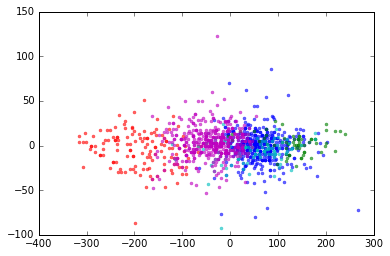

In [8]:
#not using scaled data
import matplotlib.pyplot as plt
%matplotlib inline

data_sub_noname

data_sub_noname['INSTNM'] = data_sub['INSTNM']

from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)

X = data_sub_noname[['ADM_RATE', 'PAR_ED_PCT_1STGEN','SATMTMID','SATVRMID','UGDS_ASIAN','UGDS_BLACK','UGDS_HISP','UGDS_WHITE']]
pca_model.fit(X)
scores = pca_model.transform(X) # [first p comp, second p comp]

scores = pca_model.fit_transform(X)

for i in range(6):
    plt.plot(scores[model.labels_ == i,0], scores[model.labels_ == i,1], '.', alpha = .6)

If there are too many colors overlapping, that means that there were too many clusters.